##Carga de rutas.txt

Las rutas relativas están en un archivo .txt por si hay que realizar modificaciones posteriores.

In [ ]:
rutas = './rutas.txt'

In [ ]:
with open(rutas, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

##Instalación de librerías


In [ ]:
# !pip install -r requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


##Carga de datasets

In [ ]:
df_atributos = pd.read_csv(atributos)
df_transacciones = pd.read_csv(transacciones)

In [ ]:
df_atributos.head()

,Unnamed: 0,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal
0,10,175519,HighUsage,5.18752,4.1000,16,Medio,Bajo,4.Activos,Kioscos/Maxikioscos
1,13,28533,HighUsage,4.76866,3.9211,34,Alto,Medio,4.Activos,Tradicional
2,19,32182,PowerUsage,5.97930,6.7500,34,Alto,Medio,4.Activos,Tradicional
3,20,327976,MinimalUsage,6.02852,3.5833,14,Alto,Medio,4.Activos,COMIDA
4,24,354640,PowerUsage,7.52500,3.2000,18,Bajo,S/D,4.Activos,Tradicional


In [ ]:
df_atributos.shape

(4400, 10)

In [ ]:
df_atributos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4400 non-null   int64  
 1   POC                          4400 non-null   int64  
 2   BussinessSegment             4400 non-null   object 
 3   totalVolumen                 4400 non-null   float64
 4   SkuDistintosPromediosXOrden  4400 non-null   float64
 5   SkuDistintosToTales          4400 non-null   int64  
 6   concentracion                4400 non-null   object 
 7   nse                          4400 non-null   object 
 8   segmentoUnico                4325 non-null   object 
 9   canal                        4386 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 343.9+ KB


In [ ]:
df_atributos['POC'].nunique()

4400

In [ ]:
df_transacciones.head()

,Unnamed: 0,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
0,0,430606,7038,20220729,512-3880249-0,100.0
1,1,323267,14933,20220729,512-3882307-0,1.0
2,2,357825,21971,20220723,512-3852880-0,8.0
3,3,444926,7038,20220805,512-3913163-0,20.0
4,4,450771,7030,20220816,512-3957000-0,5.0


In [ ]:
df_transacciones.shape

(280828, 6)

In [ ]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280828 entries, 0 to 280827
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        280828 non-null  int64  
 1   ACCOUNT_ID        280828 non-null  int64  
 2   SKU_ID            280828 non-null  int64  
 3   INVOICE_DATE      280828 non-null  int64  
 4   ORDER_ID          280828 non-null  object 
 5   ITEMS_PHYS_CASES  280828 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 12.9+ MB


In [ ]:
df_transacciones['ACCOUNT_ID'].nunique()

4535

Lo primero que podemos observar es que en transacciones hay 4535 usuarios y tenemos atributos de 4400. Vamos a hacer un outer join, conservando todos los valores que no tengan coincidencia, y después definimos cómo tratar los nulos.

In [ ]:
df = pd.merge(df_atributos, df_transacciones, left_on='POC', right_on='ACCOUNT_ID', how='outer')

In [ ]:
df.head()

,Unnamed: 0_x,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal,Unnamed: 0_y,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
0,10.0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,30080.0,175519.0,7038.0,20220706.0,512-3775628-0,2.0
1,10.0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,37516.0,175519.0,7038.0,20220824.0,512-3995698-0,2.0
2,10.0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,46641.0,175519.0,77846.0,20220810.0,512-3935834-0,1.0
3,10.0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,52162.0,175519.0,7651.0,20220820.0,512-3981409-0,1.0
4,10.0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,54769.0,175519.0,7038.0,20220820.0,512-3981409-0,1.0


In [ ]:
df.shape

(280849, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280849 entries, 0 to 280848
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0_x                 278817 non-null  float64
 1   POC                          278817 non-null  float64
 2   BussinessSegment             278817 non-null  object 
 3   totalVolumen                 278817 non-null  float64
 4   SkuDistintosPromediosXOrden  278817 non-null  float64
 5   SkuDistintosToTales          278817 non-null  float64
 6   concentracion                278817 non-null  object 
 7   nse                          278817 non-null  object 
 8   segmentoUnico                274684 non-null  object 
 9   canal                        278365 non-null  object 
 10  Unnamed: 0_y                 280828 non-null  float64
 11  ACCOUNT_ID                   280828 non-null  float64
 12  SKU_ID                       280828 non-null  float64
 13 

In [ ]:
df.columns

Index(['Unnamed: 0_x', 'POC', 'BussinessSegment', 'totalVolumen',
       'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'concentracion',
       'nse', 'segmentoUnico', 'canal', 'Unnamed: 0_y', 'ACCOUNT_ID', 'SKU_ID',
       'INVOICE_DATE', 'ORDER_ID', 'ITEMS_PHYS_CASES'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)

In [ ]:
df.head()

,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
0,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,175519.0,7038.0,20220706.0,512-3775628-0,2.0
1,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,175519.0,7038.0,20220824.0,512-3995698-0,2.0
2,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,175519.0,77846.0,20220810.0,512-3935834-0,1.0
3,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,175519.0,7651.0,20220820.0,512-3981409-0,1.0
4,175519.0,HighUsage,5.18752,4.1,16.0,Medio,Bajo,4.Activos,Kioscos/Maxikioscos,175519.0,7038.0,20220820.0,512-3981409-0,1.0


In [ ]:
df.shape

(280849, 14)

##Verificación de nulos

In [ ]:
for columna in df.columns:
    nulos = df[columna].isnull().sum()
    porcentaje = round(nulos/len(df)*100, 2)
    print(f'Columna: {columna:30}   Cantidad de nulos: {nulos:<10}   Porcentaje de nulos: {porcentaje} %')

Columna: POC                              Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: BussinessSegment                 Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: totalVolumen                     Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: SkuDistintosPromediosXOrden      Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: SkuDistintosToTales              Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: concentracion                    Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: nse                              Cantidad de nulos: 2032         Porcentaje de nulos: 0.72 %
Columna: segmentoUnico                    Cantidad de nulos: 6165         Porcentaje de nulos: 2.2 %
Columna: canal                            Cantidad de nulos: 2484         Porcentaje de nulos: 0.88 %
Columna: ACCOUNT_ID                       Cantidad de nulos: 21           Porcentaj

In [ ]:
df[df['ACCOUNT_ID'].isnull()]

,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
2323,445757.0,MediumUsage,0.84960,1.0000,1.0,Medio,Bajo,1.Inactivos,Tradicional,NaN,NaN,NaN,NaN,NaN
6443,304550.0,HighUsage,1.90040,2.0000,4.0,Medio,S/D,2.Masivos,COMIDA,NaN,NaN,NaN,NaN,NaN
10117,178301.0,MediumUsage,0.32124,4.0000,4.0,Medio,Bajo,2.Masivos,COMIDA,NaN,NaN,NaN,NaN,NaN
23496,428218.0,HighUsage,1.36224,1.0000,2.0,Medio,Medio,2.Masivos,Autoservicio,NaN,NaN,NaN,NaN,NaN
23568,449134.0,PowerUsage,3.84024,3.3333,9.0,Medio,Bajo,1.Inactivos,Tradicional,NaN,NaN,NaN,NaN,NaN
24008,382530.0,PowerUsage,1.20000,1.0000,1.0,Alto,S/D,1.Inactivos,Tradicional,NaN,NaN,NaN,NaN,NaN
43615,178295.0,MediumUsage,0.23352,2.0000,3.0,Medio,Medio,2.Masivos,COMIDA,NaN,NaN,NaN,NaN,NaN
79522,447627.0,MediumUsage,0.04500,1.0000,1.0,Alto,Medio,1.Inactivos,Autoservicio,NaN,NaN,NaN,NaN,NaN
81195,126337.0,PowerUsage,0.25146,3.0000,8.0,Alto,Medio,2.Masivos,Autoservicio,NaN,NaN,NaN,NaN,NaN
85077,375864.0,PowerUsage,0.44958,1.7500,7.0,Alto,Medio,2.Masivos,Autoservicio,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['POC'].isnull()].sample(10)

,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
279980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424929.0,7651.0,20220615.0,102-39040633-0,2.0
279950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455900.0,21699.0,20220827.0,512-4017349-0,1.0
279107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432243.0,7038.0,20220622.0,512-3719631-0,14.0
279890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455900.0,13952.0,20220813.0,512-3953620-0,1.0
280472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408145.0,19088.0,20220607.0,102-39007001-0,1.0
279166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432243.0,7038.0,20220812.0,512-3949245-0,8.0
279253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456125.0,21970.0,20220705.0,102-39104330-0,8.0
279174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432243.0,16667.0,20220804.0,512-3907960-0,20.0
279365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171104.0,7038.0,20220630.0,102-39089449-0,2.0
280206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429424.0,25119.0,20220702.0,102-39099694-0,1.0


En un primer análisis vemos que hay muchos valores que no coinciden. De 21 usuarios que figuran en atributos no tenemos transacciones. Con respecto a los usuarios que figuran en transacciones, no tenemos atributos de más de 2000. Este va a ser un factor importante para plantear el sistema de recomendación. Esos 2032 registros no representan 2032 valores únicos de `ACCOUNT_ID`.

Reemplazamos los nulos por S/D. No tenemos datos como para hacer imputaciones. En algunos casos, si tuviésemos otros datos, podríamos imputar con distintas técnicas, como K-means. Solo se pueden calcular dos columnas en base a las transacciones: `SkuDistintosPromediosXOrden` y 	`SkuDistintosToTales`.

In [ ]:
for columna in df.columns:
    df[columna].fillna('S/D', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280849 entries, 0 to 280848
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   POC                          280849 non-null  object
 1   BussinessSegment             280849 non-null  object
 2   totalVolumen                 280849 non-null  object
 3   SkuDistintosPromediosXOrden  280849 non-null  object
 4   SkuDistintosToTales          280849 non-null  object
 5   concentracion                280849 non-null  object
 6   nse                          280849 non-null  object
 7   segmentoUnico                280849 non-null  object
 8   canal                        280849 non-null  object
 9   ACCOUNT_ID                   280849 non-null  object
 10  SKU_ID                       280849 non-null  object
 11  INVOICE_DATE                 280849 non-null  object
 12  ORDER_ID                     280849 non-null  object
 13  ITEMS_PHYS_CAS

##Verificación de duplicados

In [ ]:
df.duplicated().sum()

40

In [ ]:
df[['POC','ACCOUNT_ID', 'SKU_ID', 'ORDER_ID']][df.duplicated(subset=['POC', 'ACCOUNT_ID', 'SKU_ID', 'INVOICE_DATE', 'ORDER_ID'], keep=False)].head(20)

,POC,ACCOUNT_ID,SKU_ID,ORDER_ID
96446,453211.0,453211.0,19086.0,512-3930200-0
96449,453211.0,453211.0,19086.0,512-3930200-0
96451,453211.0,453211.0,7475.0,512-3930200-0
96454,453211.0,453211.0,23903.0,512-3930200-0
96455,453211.0,453211.0,14191.0,512-3930200-0
96456,453211.0,453211.0,23287.0,512-3930200-0
96458,453211.0,453211.0,7478.0,512-3930200-0
96464,453211.0,453211.0,21967.0,512-3930200-0
96465,453211.0,453211.0,7484.0,512-3930200-0
96470,453211.0,453211.0,21967.0,512-3930200-0


Se observan valores duplicados, se comprueba que, efectivamente, están duplicados y se borran.

In [ ]:
df.drop_duplicates(inplace=True)

##Verificación de outliers

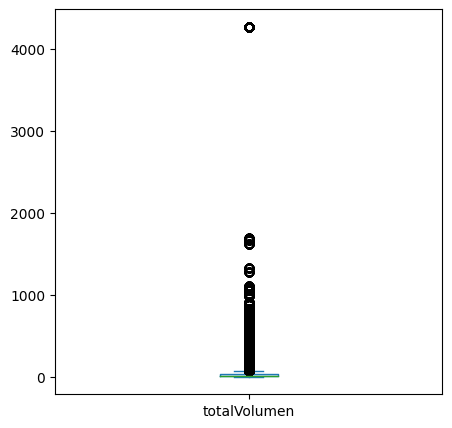

In [ ]:
df['totalVolumen'][df['totalVolumen']!='S/D'].plot(kind='box', figsize=(5,5))
plt.show()

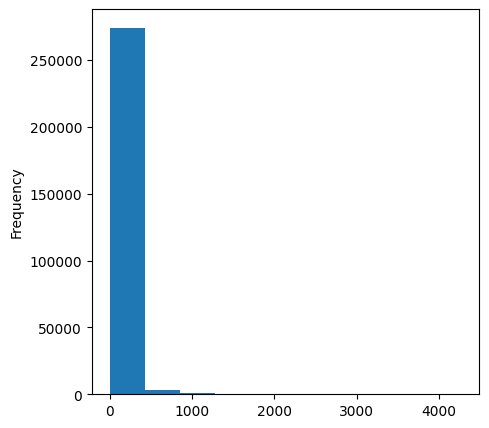

In [ ]:
df['totalVolumen'][df['totalVolumen']!='S/D'].plot(kind='hist', figsize=(5,5))
plt.show()

In [ ]:
df['SKU_ID'].nunique()

531

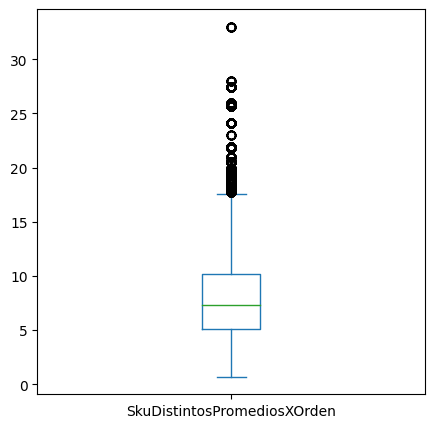

In [ ]:
df['SkuDistintosPromediosXOrden'][df['SkuDistintosPromediosXOrden']!='S/D'].plot(kind='box', figsize=(5,5))
plt.show()

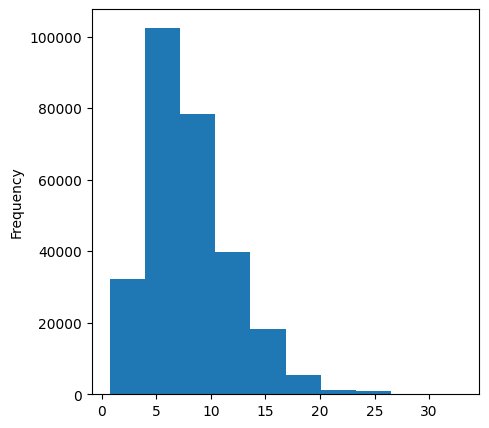

In [ ]:
df['SkuDistintosPromediosXOrden'][df['SkuDistintosPromediosXOrden']!='S/D'].plot(kind='hist', figsize=(5,5))
plt.show()

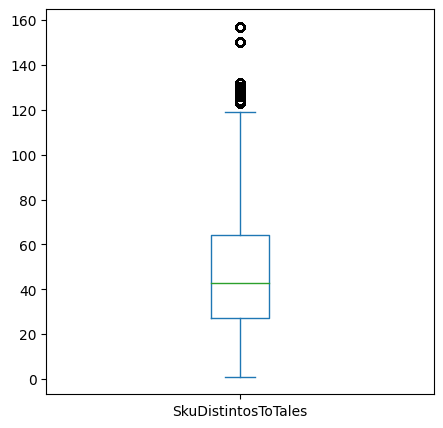

In [ ]:
df['SkuDistintosToTales'][df['SkuDistintosToTales']!='S/D'].plot(kind='box', figsize=(5,5))
plt.show()

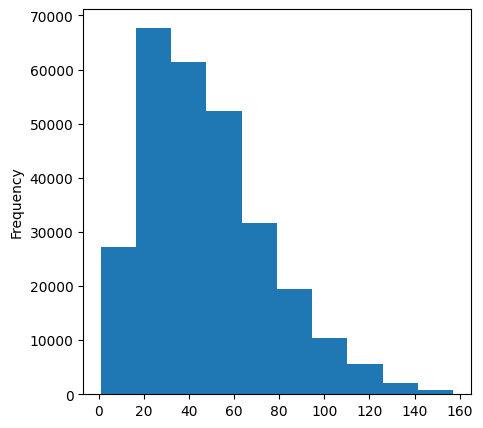

In [ ]:
df['SkuDistintosToTales'][df['SkuDistintosToTales']!='S/D'].plot(kind='hist', figsize=(5,5))
plt.show()

En términos estadísticos, se observan algunos valores atípicos. Hay que hacer un estudio más profundo para determinar resultados. Son valores que están relacionados con el volumen de compra de los clientes y la cantidad de productos.

##Verificación de valores únicos

Antes de borrar alguna de borrar `POC` o `ACCOUNT_ID`, emparejamos y verificamos.

In [ ]:
df['POC'][df['POC']=='S/D'] = df['ACCOUNT_ID']

In [ ]:
df['ACCOUNT_ID'][df['ACCOUNT_ID']=='S/D'] = df['POC']

In [ ]:
for columna in df.columns:
    if columna == 'POC' or columna == 'ACCOUNT_ID':
        print(f'Columna: {columna}    Cantidad de usuarios: {df[columna].nunique()}\n')
    elif columna == 'totalVolumen' or columna == 'SkuDistintosPromediosXOrden' or columna == 'SkuDistintosToTales' or columna == 'INVOICE_DATE' or columna == 'ITEMS_PHYS_CASES':
        continue
    elif columna == 'SKU_ID':
        print(f'Columna: {columna}    Cantidad de productos: {df[columna].nunique()}\n')
    elif columna == 'ORDER_ID':
        print(f'Columna: {columna}    Cantidad de órdenes: {df[columna].nunique()}\n')
    else:
        print(f'{columna}: {df[columna].unique()}\n')



Columna: POC    Cantidad de usuarios: 4556

BussinessSegment: ['HighUsage' 'PowerUsage' 'MinimalUsage' 'MediumUsage' 'S/D']

concentracion: ['Medio' 'Alto' 'Bajo' 'S/D']

nse: ['Bajo' 'Medio' 'S/D' 'Alto']

segmentoUnico: ['4.Activos' '5.Select' '1.Inactivos' '2.Masivos' '3.Potenciales' 'S/D']

canal: ['Kioscos/Maxikioscos' 'Tradicional' 'COMIDA' 'Autoservicio' 'BEBIDA'
 'Mayorista' 'OTROS REF' 'S/D' 'Bar/Restaurant' 'Instituciones'
 'ENTRETENIMIENTO' 'KA Minoristas']

Columna: ACCOUNT_ID    Cantidad de usuarios: 4556

Columna: SKU_ID    Cantidad de productos: 531

Columna: ORDER_ID    Cantidad de órdenes: 45548



In [ ]:
df.drop(columns=['POC'], inplace=True)

##Cálculo de columnas `SkuDistintosPromediosXOrden` y `SkuDistintosToTales`

In [ ]:
df[['ACCOUNT_ID', 'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'SKU_ID', 'ORDER_ID']][(df['SkuDistintosPromediosXOrden']=='S/D') & (df['SkuDistintosToTales']=='S/D')].head(10)

,ACCOUNT_ID,SkuDistintosPromediosXOrden,SkuDistintosToTales,SKU_ID,ORDER_ID
278817,418061.0,S/D,S/D,25643.0,512-3852499-0
278818,418061.0,S/D,S/D,7038.0,512-3982861-0
278819,418061.0,S/D,S/D,19019.0,512-3702176-0
278820,418061.0,S/D,S/D,7038.0,512-3955040-0
278821,418061.0,S/D,S/D,7651.0,512-3888308-0
278822,418061.0,S/D,S/D,19019.0,512-3637231-0
278823,418061.0,S/D,S/D,19088.0,512-3794686-0
278824,418061.0,S/D,S/D,7038.0,512-3637231-0
278825,418061.0,S/D,S/D,19339.0,512-3908720-0
278826,418061.0,S/D,S/D,7484.0,512-3908720-0


In [ ]:
df['ORDER_ID'][df['ACCOUNT_ID']==418061].nunique()

20

In [ ]:
df['SKU_ID'][df['ACCOUNT_ID']==418061].nunique()

61

In [ ]:
df[['ACCOUNT_ID', 'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'SKU_ID', 'ORDER_ID']][(df['SkuDistintosPromediosXOrden']!='S/D') & (df['SkuDistintosToTales']!='S/D')].head(10)

,ACCOUNT_ID,SkuDistintosPromediosXOrden,SkuDistintosToTales,SKU_ID,ORDER_ID
0,175519.0,4.1,16.0,7038.0,512-3775628-0
1,175519.0,4.1,16.0,7038.0,512-3995698-0
2,175519.0,4.1,16.0,77846.0,512-3935834-0
3,175519.0,4.1,16.0,7651.0,512-3981409-0
4,175519.0,4.1,16.0,7038.0,512-3981409-0
5,175519.0,4.1,16.0,19088.0,512-3901703-0
6,175519.0,4.1,16.0,26567.0,512-4015365-0
7,175519.0,4.1,16.0,7651.0,512-3759620-0
8,175519.0,4.1,16.0,26567.0,512-3901703-0
9,175519.0,4.1,16.0,19088.0,512-3735462-0


In [ ]:
df['ORDER_ID'][df['ACCOUNT_ID']==175519].nunique()

14

In [ ]:
df['SKU_ID'][df['ACCOUNT_ID']==175519].nunique()

13

Se tomó un ID cualquiera para verificar valores y no coincide la cantidad de productos distintos.


Para verificar, hacemos una prueba con un sample.

In [ ]:
df_prueba = df[['ACCOUNT_ID', 'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'SKU_ID', 'ORDER_ID']][(df['SkuDistintosPromediosXOrden']!='S/D') & (df['SkuDistintosToTales']!='S/D')].sample(10)

In [ ]:
df_prueba

,ACCOUNT_ID,SkuDistintosPromediosXOrden,SkuDistintosToTales,SKU_ID,ORDER_ID
107491,364110.0,6.8696,40.0,25059.0,512-3706593-0
108586,309318.0,6.5,77.0,2201.0,512-3877194-0
269138,451283.0,7.6667,18.0,76503.0,512-3690410-0
126408,408579.0,5.0238,70.0,1416.0,512-3868676-0
16593,338266.0,4.4118,37.0,15094.0,512-3635713-0
183057,427863.0,4.8846,42.0,24880.0,512-3863612-0
231847,181563.0,4.4444,19.0,8101.0,512-4005896-0
139685,452188.0,3.9592,60.0,25188.0,512-3737989-0
183754,391252.0,11.0,17.0,20433.0,512-3652116-0
43969,432333.0,5.2162,39.0,19336.0,512-3777124-0


In [ ]:
df_prueba['total_calculado'] = 0

In [ ]:
for registro in df_prueba['ACCOUNT_ID']:
    calculado = df['SKU_ID'][df['ACCOUNT_ID']==registro].nunique()
    # original = int(df_prueba['SkuDistintosToTales'][df_prueba['ACCOUNT_ID']==registro].values)
    df_prueba['total_calculado'][df_prueba['ACCOUNT_ID']==registro] = calculado


In [ ]:
df_prueba['promedio_calculado'] = 0

In [ ]:
for registro in df_prueba['ACCOUNT_ID']:
    productos = 0
    ordenes = 0
    lista = df['ORDER_ID'][df['ACCOUNT_ID']==registro].unique()
    for orden in lista:
        productos += df['SKU_ID'][df['ORDER_ID']==orden].nunique()
        ordenes += 1
    df_prueba['promedio_calculado'][df_prueba['ACCOUNT_ID']==registro] = round(productos/ordenes, 2)


In [ ]:
df_prueba

,ACCOUNT_ID,SkuDistintosPromediosXOrden,SkuDistintosToTales,SKU_ID,ORDER_ID,total_calculado,promedio_calculado
107491,364110.0,6.8696,40.0,25059.0,512-3706593-0,38,5.84
108586,309318.0,6.5,77.0,2201.0,512-3877194-0,75,9.59
269138,451283.0,7.6667,18.0,76503.0,512-3690410-0,16,5.83
126408,408579.0,5.0238,70.0,1416.0,512-3868676-0,68,4.79
16593,338266.0,4.4118,37.0,15094.0,512-3635713-0,36,4.33
183057,427863.0,4.8846,42.0,24880.0,512-3863612-0,41,3.63
231847,181563.0,4.4444,19.0,8101.0,512-4005896-0,18,3.44
139685,452188.0,3.9592,60.0,25188.0,512-3737989-0,52,7.17
183754,391252.0,11.0,17.0,20433.0,512-3652116-0,16,7.67
43969,432333.0,5.2162,39.0,19336.0,512-3777124-0,38,4.71


Se observan diferencias entre los valores calculados con la tabla de transacciones y los valores cargados en atributos. Si bien no son grandes diferencias, esto puede disminuir la performance del modelo. Para tener más datos en atributos, vamos a calcular `SkuDistintosPromediosXOrden` y `SkuDistintosToTales`, asumiendo estas mínimas diferencias.

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosPromediosXOrden']=='S/D'].count()

2032

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosPromediosXOrden']=='S/D'].nunique()

156

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosToTales']=='S/D'].count()

2032

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosToTales']=='S/D'].nunique()

156

In [ ]:
for registro in df['ACCOUNT_ID'][df['SkuDistintosToTales']=='S/D'].unique():
    calculado = df['SKU_ID'][df['ACCOUNT_ID']==registro].nunique()
    df['SkuDistintosToTales'][df['ACCOUNT_ID']==registro] = calculado


In [ ]:
for registro in df['ACCOUNT_ID'][df['SkuDistintosPromediosXOrden']=='S/D'].unique():
    productos = 0
    ordenes = 0
    lista = df['ORDER_ID'][df['ACCOUNT_ID']==registro].unique()
    for orden in lista:
        productos += df['SKU_ID'][df['ORDER_ID']==orden].nunique()
        ordenes += 1
    df['SkuDistintosPromediosXOrden'][df['ACCOUNT_ID']==registro] = round(productos/ordenes, 2)

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosPromediosXOrden']=='S/D'].count()

0

In [ ]:
df['ACCOUNT_ID'][df['SkuDistintosToTales']=='S/D'].count()

0

In [ ]:
df.sample(20)

,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
164096,MediumUsage,1.6401,4.3,15.0,Alto,Medio,1.Inactivos,Kioscos/Maxikioscos,456940.0,19086.0,20220707.0,512-3783928-0,2.0
79711,PowerUsage,12.8902,3.4565,60.0,S/D,S/D,5.Select,Kioscos/Maxikioscos,457680.0,77727.0,20220720.0,512-3834961-0,1.0
120866,PowerUsage,13.6052,15.85,80.0,Alto,Medio,4.Activos,Tradicional,368788.0,22256.0,20220609.0,512-3671487-0,1.0
264244,MediumUsage,87.83382,8.2246,37.0,Alto,Medio,4.Activos,COMIDA,31315.0,816.0,20220603.0,512-3631823-0,4.0
215319,MediumUsage,17.46434,7.15,51.0,Alto,Medio,4.Activos,Tradicional,111977.0,21973.0,20220714.0,512-3809775-0,1.0
207572,MinimalUsage,7.73554,11.75,49.0,Alto,Medio,2.Masivos,Tradicional,453774.0,7634.0,20220707.0,512-3771013-0,1.0
190165,HighUsage,6.14518,3.2955,17.0,Medio,Medio,2.Masivos,Kioscos/Maxikioscos,180078.0,7038.0,20220824.0,512-3998870-0,1.0
136985,PowerUsage,8.6394,5.0,23.0,Alto,Medio,4.Activos,COMIDA,433948.0,19538.0,20220628.0,512-3743140-0,1.0
227298,HighUsage,14.26511,4.4423,23.0,S/D,S/D,4.Activos,Kioscos/Maxikioscos,456328.0,19088.0,20220711.0,512-3792387-0,3.0
146148,HighUsage,12.5895,6.8611,42.0,Alto,Medio,2.Masivos,Tradicional,448402.0,6582.0,20220830.0,512-4027596-0,1.0


###Transformaciones y especificación de tipo de dato

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280809 entries, 0 to 280848
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   BussinessSegment             280809 non-null  object
 1   totalVolumen                 280809 non-null  object
 2   SkuDistintosPromediosXOrden  280809 non-null  object
 3   SkuDistintosToTales          280809 non-null  object
 4   concentracion                280809 non-null  object
 5   nse                          280809 non-null  object
 6   segmentoUnico                280809 non-null  object
 7   canal                        280809 non-null  object
 8   ACCOUNT_ID                   280809 non-null  object
 9   SKU_ID                       280809 non-null  object
 10  INVOICE_DATE                 280809 non-null  object
 11  ORDER_ID                     280809 non-null  object
 12  ITEMS_PHYS_CASES             280809 non-null  object
dtypes: object(13)
memor

Ordenamos el df y normalizamos los nombres (PEP8).

In [ ]:
nombres = {'BussinessSegment':'perfil_digital', 'totalVolumen':'volumen_total', 'SkuDistintosPromediosXOrden':'productos_distintos_promedio',
           'SkuDistintosToTales':'productos_distintos_total', 'segmentoUnico':'segmento_unico', 'ACCOUNT_ID':'id_usuario', 'SKU_ID':'id_producto',
           'INVOICE_DATE':'fecha', 'ORDER_ID':'id_orden', 'ITEMS_PHYS_CASES':'bultos_productos'}

In [ ]:
df.rename(columns=nombres, inplace=True)

In [ ]:
df.columns

Index(['perfil_digital', 'volumen_total', 'productos_distintos_promedio',
       'productos_distintos_total', 'concentracion', 'nse', 'segmento_unico',
       'canal', 'id_usuario', 'id_producto', 'fecha', 'id_orden',
       'bultos_productos'],
      dtype='object')

In [ ]:
df = df[['id_usuario', 'id_producto', 'id_orden', 'fecha', 'perfil_digital', 'volumen_total', 'productos_distintos_promedio', 'productos_distintos_total', 'segmento_unico', 'concentracion', 'nse', 'canal', 'bultos_productos']]


In [ ]:
df.head()

,id_usuario,id_producto,id_orden,fecha,perfil_digital,volumen_total,productos_distintos_promedio,productos_distintos_total,segmento_unico,concentracion,nse,canal,bultos_productos
0,175519.0,7038.0,512-3775628-0,20220706.0,HighUsage,5.18752,4.1,16.0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2.0
1,175519.0,7038.0,512-3995698-0,20220824.0,HighUsage,5.18752,4.1,16.0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2.0
2,175519.0,77846.0,512-3935834-0,20220810.0,HighUsage,5.18752,4.1,16.0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1.0
3,175519.0,7651.0,512-3981409-0,20220820.0,HighUsage,5.18752,4.1,16.0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1.0
4,175519.0,7038.0,512-3981409-0,20220820.0,HighUsage,5.18752,4.1,16.0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1.0


In [ ]:
df[(df['id_producto']=='S/D') | (df['id_orden']=='S/D')].count()

id_usuario                      21
id_producto                     21
id_orden                        21
fecha                           21
perfil_digital                  21
volumen_total                   21
productos_distintos_promedio    21
productos_distintos_total       21
segmento_unico                  21
concentracion                   21
nse                             21
canal                           21
bultos_productos                21
dtype: int64

Borramos los registros que no tienen productos, ya que no van a servir para el modelo. Es cierto que tenemos atributos para esos clientes, pero al no tener los productos no podemos combinar esa información.

In [ ]:
df.drop(df[df['id_producto']=='S/D'].index, inplace=True)

In [ ]:
df[df['volumen_total']=='S/D'].count()

id_usuario                      2032
id_producto                     2032
id_orden                        2032
fecha                           2032
perfil_digital                  2032
volumen_total                   2032
productos_distintos_promedio    2032
productos_distintos_total       2032
segmento_unico                  2032
concentracion                   2032
nse                             2032
canal                           2032
bultos_productos                2032
dtype: int64

In [ ]:
df[df['volumen_total']=='S/D'].head()

,id_usuario,id_producto,id_orden,fecha,perfil_digital,volumen_total,productos_distintos_promedio,productos_distintos_total,segmento_unico,concentracion,nse,canal,bultos_productos
278817,418061.0,25643.0,512-3852499-0,20220723.0,S/D,S/D,8.6,61,S/D,S/D,S/D,S/D,4.0
278818,418061.0,7038.0,512-3982861-0,20220820.0,S/D,S/D,8.6,61,S/D,S/D,S/D,S/D,5.0
278819,418061.0,19019.0,512-3702176-0,20220616.0,S/D,S/D,8.6,61,S/D,S/D,S/D,S/D,4.0
278820,418061.0,7038.0,512-3955040-0,20220813.0,S/D,S/D,8.6,61,S/D,S/D,S/D,S/D,5.0
278821,418061.0,7651.0,512-3888308-0,20220730.0,S/D,S/D,8.6,61,S/D,S/D,S/D,S/D,4.0


In [ ]:
df['id_usuario'] = df['id_usuario'].astype(int)
df['id_producto'] = df['id_producto'].astype(int)
df['fecha'] = df['fecha'].astype(str)
# df['volumen_total'] = df['volumen_total'].astype(float)
df['productos_distintos_promedio'] = df['productos_distintos_promedio'].astype(float)
df['productos_distintos_total'] = df['productos_distintos_total'].astype(int)
df['bultos_productos'] = df['bultos_productos'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280788 entries, 0 to 280848
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_usuario                    280788 non-null  int64  
 1   id_producto                   280788 non-null  int64  
 2   id_orden                      280788 non-null  object 
 3   fecha                         280788 non-null  object 
 4   perfil_digital                280788 non-null  object 
 5   volumen_total                 280788 non-null  object 
 6   productos_distintos_promedio  280788 non-null  float64
 7   productos_distintos_total     280788 non-null  int64  
 8   segmento_unico                280788 non-null  object 
 9   concentracion                 280788 non-null  object 
 10  nse                           280788 non-null  object 
 11  canal                         280788 non-null  object 
 12  bultos_productos              280788 non-null  in

In [ ]:
df.head(2)

,id_usuario,id_producto,id_orden,fecha,perfil_digital,volumen_total,productos_distintos_promedio,productos_distintos_total,segmento_unico,concentracion,nse,canal,bultos_productos
0,175519,7038,512-3775628-0,20220706.0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2
1,175519,7038,512-3995698-0,20220824.0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2


In [ ]:
df['anio'] = df['fecha'].str[:4].astype(int)
df['mes'] = df['fecha'].str[4:6].astype(int)
df['dia'] = df['fecha'].str[6:8].astype(int)

In [ ]:
df.drop(columns=['fecha'], inplace=True)

In [ ]:
df.head()

,id_usuario,id_producto,id_orden,perfil_digital,volumen_total,productos_distintos_promedio,productos_distintos_total,segmento_unico,concentracion,nse,canal,bultos_productos,anio,mes,dia
0,175519,7038,512-3775628-0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2,2022,7,6
1,175519,7038,512-3995698-0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,2,2022,8,24
2,175519,77846,512-3935834-0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1,2022,8,10
3,175519,7651,512-3981409-0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1,2022,8,20
4,175519,7038,512-3981409-0,HighUsage,5.18752,4.1,16,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,1,2022,8,20


###Día de la semana

In [ ]:
df['fecha'] = df.apply(lambda row: datetime(2022, row['mes'], row['dia']), axis=1)
# 0 = Lunes, 6 = Domingo
df['dia_semana'] = df['fecha'].dt.dayofweek
df.drop(columns=['fecha'], inplace=True)
pedidos_por_dia = df.groupby('dia_semana')['id_orden'].nunique()

In [ ]:
pedidos_por_dia

dia_semana
0    3410
1    8416
2    9483
3    8576
4    9190
5    6477
Name: id_orden, dtype: int64

###Justificación para Incluir el Día de la Semana como Característica

#### Análisis de Datos

Se realizó un análisis de la cantidad de pedidos según el día de la semana utilizando el dataset proporcionado. Los resultados mostraron que hay variaciones significativas en la cantidad de pedidos realizados en diferentes días de la semana. A continuación se presenta la distribución de pedidos por día de la semana:

- Lunes: 3410 pedidos
- Martes: 8416 pedidos
- Miércoles: 9483 pedidos
- Jueves: 8576 pedidos
- Viernes: 9190 pedidos
- Sábado: 6477 pedidos

Esta distribución no es uniforme, lo que indica que los patrones de compra de los clientes varían significativamente según el día de la semana.

#### Justificación

La inclusión del día de la semana como una característica en el modelo de predicción es importante por las siguientes razones:

1. **Captura de Patrones de Compra**: La variación en la cantidad de pedidos según el día de la semana sugiere que los clientes tienen hábitos de compra específicos en ciertos días. Capturar estos patrones puede mejorar la precisión del modelo al predecir futuras compras.
   
2. **Mejora del Rendimiento del Modelo**: Incluir el día de la semana como característica permite al modelo aprender y ajustar sus predicciones en función de estos patrones temporales. Esto puede llevar a recomendaciones más precisas y personalizadas para cada cliente.

3. **Información Adicional**: El día de la semana proporciona información contextual adicional que puede ser útil para el modelo. Esto es especialmente relevante en aplicaciones de ventas y marketing, donde las promociones y ofertas pueden variar según el día.

En resumen, la inclusión del día de la semana como característica en el modelo de predicción está justificada debido a las variaciones significativas en los patrones de compra observadas en el análisis de datos. Esto mejorará la capacidad del modelo para predecir con precisión las futuras compras de los clientes.

###`volumen_total`

Reemplazamos los S/D de la variable `volumen_total` con -1 para cargarla en el dataset limpio como variable numérica. Más adelante evaluaremos si sirve para el modelado.

In [ ]:
df['volumen_total'].replace('S/D', -1, inplace=True)
df['volumen_total'] = df['volumen_total'].astype(float)

Reordenamos para juntar las variables categóricas.

In [ ]:
df.columns

Index(['id_usuario', 'id_producto', 'id_orden', 'perfil_digital',
       'volumen_total', 'productos_distintos_promedio',
       'productos_distintos_total', 'segmento_unico', 'concentracion', 'nse',
       'canal', 'bultos_productos', 'anio', 'mes', 'dia', 'dia_semana'],
      dtype='object')

In [ ]:
df = df[['id_orden', 'anio', 'mes', 'dia', 'dia_semana', 'id_usuario',  'volumen_total', 'productos_distintos_promedio',
       'productos_distintos_total', 'bultos_productos', 'perfil_digital', 'segmento_unico', 'concentracion', 'nse',
       'canal', 'id_producto']]

##Guardamos el dataset en la carpeta Datasets

In [ ]:
df.to_csv(dataset_limpio, index=False)